# How to use this new notebook

1. Run the following sections, 
    - Setup environment
    - Generate TF-IDF Vector
    - Generate classification model
    - Cross-validation
2. Proceed to the `Start here!!!` section
3. Run the `Fitting & predicting model` section to predict the test dataset.
4. If you wish to generate new dataset with cross-validation, simply uncomment the `cross_validate()` function



# Setup environment

## Setup library

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!pip install pythainlp

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from pythainlp.tokenize import word_tokenize

test = "สวัสดี วันนี้วันจันทร์ เช้าที่ไม่เคยสดใจ ในเมืองที่หมองหม่น"
print(word_tokenize(test))

['สวัสดี', ' ', 'วันนี้', 'วัน', 'จันทร์', ' ', 'เช้า', 'ที่', 'ไม่', 'เคย', 'สด', 'ใจ', ' ', 'ใน', 'เมือง', 'ที่', 'หมองหม่น']


## Setup dataset

In [56]:
# Our Dataset
df_sentiment1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TwitterMental/IR_Dataset1.csv')
df_sentiment2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TwitterMental/IR_Dataset2.csv')
df_sentiment3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TwitterMental/IR_Dataset3.csv')

df_sentiment1 = df_sentiment1[['text', 'sentiment']]
df_sentiment2 = df_sentiment2[['text', 'sentiment']]
df_sentiment3 = df_sentiment3[['text', 'sentiment']]
df_sentiment = df_sentiment1.append(df_sentiment2)
df_sentiment = df_sentiment.append(df_sentiment3)

df_sentiment = df_sentiment1[df_sentiment1['sentiment'] != 'unclassifiable']
df_sentiment

,text,sentiment
1,ที่ ส.ส แบบนี้มันยังอยู่ได้ เพราะมันก็มีคนยังเ...,anger
4,แล้วโกรธอะไรเสี่ยวถิงน้องทำไรให้? มาบอกว่าน้อง...,anger
5,ไม่เอาลูกมันก็โกรธ พาลโกรธเพื่อนเราที่เข้ามาช่...,anger
7,กุโทรหาแม่ แต่แม่รับแล้วเอาโทรศัพท์ให้พ่อคุย ก...,anger
9,รีล่าคือ ไอ้เหี้ย กุเห้นแล้วโกรธ่ะโกรธ มึงนี่ม...,anger
...,...,...
1793,"""อุ้ย แบบเย็นชอบเหมือนกันเลยค่ะ..."" ดูประหลาดใ...",surprise
1795,ประหลาดใจนักที่ได้รับข้อความตอบกลับมา เผยรอยยิ...,surprise
1796,หนูไม่คิดว่าพี่จะเล่นมุกนี้ ประหลาดใจ….,surprise
1797,"""นี่นาย.!!"" ู้สึกประหลาดใจอย่างบอกไม่ถูก พอเห็...",surprise


In [57]:
# encoding = {
#     'anger': 0,
#     'disgust': 1,
#     'fear': 2,
#     'joy': 3,
#     'sadness': 4, 
#     'surprise': 5,
# }

encoding = {
    'anger': 'anger',
    'disgust': 'disgust',
    'fear': 'fear',
    'joy': 'joy',
    'sadness': "sadness", 
    'surprise': 'surprise',
}


y_sentiment_encoded = [encoding[sentiment] for sentiment in df_sentiment['sentiment'].values if sentiment != 'unclassifiable']

## Setup train test spliting

In [42]:
X = df_sentiment['text'].values
y = np.array(y_sentiment_encoded)
print(X)
print(y)
print(X.shape)
print(y.shape)

['ที่ ส.ส แบบนี้มันยังอยู่ได้ เพราะมันก็มีคนยังเลือก ประเภทด่าตอนเขาหายหัว แล้วดีใจตอนเขาให้เงิน ลืมสิ้นความโกรธทุกอย่าง ต้องหยุดวงจรอุบาทว์นี่ คือเจ็บแล้วต้องจำ ไม่รับเงิน ไม่ใช่อ้างว่าคนเราต้องกินต้องใช้ มันถึงวนเป็นลูปงี้ไม่จบสิ้น'
 'แล้วโกรธอะไรเสี่ยวถิงน้องทำไรให้? มาบอกว่าน้องเป็นเด็กล็อก พูดงี้มันทำให้น้องเสียหาย ถ้าโกรธเพราะได้ซีนเยอะ ทำไมไม่โกรธคนตัดต่อเอ็มเน็ต ถ้าอีพีถัดๆไปก็รอดูว่าถ้าได้ซีนแกง ยังจะมาพูดว่าล็อกอีก ไหม อย่างน้อยก็น่าจะเห็นความสามารถน้องบ้าง แต่คงไม่เห็นหรอก อคติบังตา'
 'ไม่เอาลูกมันก็โกรธ พาลโกรธเพื่อนเราที่เข้ามาช่วยอีกูกน้องระยำรังควานชาวบ้านไปทั่วก็ไม่รู้จักจัดการ พอเขาดำเนินการตามกฎหมายกับลูกน้องมันจนมันซัดทอด มันก็พาลโกรธพวกเขาอีกุป ปัญหามันอยู่ที่ใครก็เห็นๆกันอยู่่ยอมรับความจริงแล้วยังออกแผนระยำรังควานเข่นฆ่าคนอื่นไม่หยุดอีก'
 ... 'หนูไม่คิดว่าพี่จะเล่นมุกนี้ ประหลาดใจ….'
 '"นี่นาย.!!" ู้สึกประหลาดใจอย่างบอกไม่ถูก พอเห็นของที่ชอบก็ทำให้หายเหนื่อยขึ้นมาทันที ังไม่เคยบอกเลย ไปรู้มาจากไหนเนี่ย? \\ "อะแฮ่ม!! ฉันไม่ได้บอกว่าอยากได้สักหน่อย" "แต่นายซื้อมาแล้ว

In [43]:
from sklearn.model_selection import train_test_split
def split_dataset(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = split_dataset(X, y)

In [44]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({'joy': 193, 'surprise': 183, 'fear': 171, 'anger': 149, 'sadness': 145, 'disgust': 128})
Counter({'joy': 48, 'surprise': 46, 'fear': 43, 'anger': 37, 'sadness': 37, 'disgust': 32})


# TF-IDF Vector Factory

In [45]:
from pythainlp.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

def generate_vectorizer(X_train, X_test) -> TfidfVectorizer:
    vectorizer = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))
    text_train = vectorizer.fit_transform(X_train.astype('U'))
    text_test = vectorizer.transform(X_test)
    print("train shape: {}\ntest shape: {}".format(text_train.shape, text_test.shape))
    return vectorizer, text_train, text_test

# Classification Model Factory

In [46]:
from typing import Union
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Run classifier
def generate_model(type: str) -> Union[LinearSVC, LogisticRegression, MultinomialNB]:
    if (type == "svm"):
        return LinearSVC(random_state=42)
    elif (type == "lr"):
        return LogisticRegression(solver="liblinear", random_state=42)
    elif (type == "nb"):
        return MultinomialNB()
    else:
        raise Exception("Invalid model type.")

# svm_classifier = svm.LinearSVC(random_state=42)

# svm_classifier.fit(text_train, y_train)

# y_score = svm_classifier.decision_function(text_test)
# y_pred = svm_classifier.predict(text_test)

# Cross-validation Factory

In [47]:
from typing import List
def findMaximumPair(macro: List[float], weighted: List[float]):
    pairs = []
    for index in range(0, len(macro)):
        pairs.append((macro[index], weighted[index]))
    return pairs.index(max(pairs))


In [48]:
from sklearn.model_selection import StratifiedKFold
def set_K_folds(kFolds: int):
    return StratifiedKFold(n_splits=10, random_state=42, shuffle=True)


In [49]:
from sklearn.pipeline import make_pipeline
def generate_pipeline(type: str):
    if (type == "svm"):
        tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))
        model = LinearSVC(random_state=42)
        clf = make_pipeline(tfidf, model)
    elif (type == "lr"):
        tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))
        model = LogisticRegression(solver="liblinear", random_state=42)
        clf = make_pipeline(tfidf, model)
    elif (type == "nb"):
        tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))
        model = MultinomialNB()
        clf = make_pipeline(tfidf, model)
    else: 
        raise Exception("Invalid model type.")
    return clf

In [50]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
def cross_validate(folds: int, model: ['svm', 'lr'], X, y):
    # Setup k fold & pipeline
    cv = set_K_folds(folds)
    clf = generate_pipeline(model)

    # compute cross-validation scores
    f1_macro_scores = cross_val_score(clf, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    f1_weighted_scores = cross_val_score(clf, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)

    cv_train_index = []
    cv_test_index = []
    for train, test in cv.split(X, y):
        # print('train: %s, test: %s' % (train, test))
        cv_train_index.append(train)
        cv_test_index.append(test)
    
    index = findMaximumPair(f1_macro_scores, f1_weighted_scores)
    X_train = X[cv_train_index[index]]
    X_test = X[cv_test_index[index]]
    y_train = y[cv_train_index[index]]
    y_test = y[cv_test_index[index]]
    return X_train, X_test, y_train, y_test


# Start here!!! 


# Fitting & predicting model

In [54]:
# Select model, either 'svm'(Support Vector Machine) or 'lr'(Logistic Regression)
model_type = 'lr'

# Regular train test dataset spliting
# X_train, X_test, y_train, y_test = split_dataset(X, y)

# Uncomment to do cross-validation
X_train, X_test, y_train, y_test = cross_validate(10, model_type, X, y)

vectorizer, text_train, text_test = generate_vectorizer(X_train, X_test)
classifier_model = generate_model(model_type)
classifier_model.fit(text_train, y_train)

y_predict = classifier_model.predict(text_test)
# y_predict

train shape: (1090, 4534)
test shape: (122, 4534)


# Evaluation report

## Classification report

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, digits=3, zero_division=0))

              precision    recall  f1-score   support

       anger      1.000     0.895     0.944        19
     disgust      1.000     1.000     1.000        16
        fear      0.909     0.952     0.930        21
         joy      0.958     0.958     0.958        24
     sadness      0.950     1.000     0.974        19
    surprise      1.000     1.000     1.000        23

    accuracy                          0.967       122
   macro avg      0.970     0.968     0.968       122
weighted avg      0.968     0.967     0.967       122



## Confusion Matrix

[[18  0  0  0  0  0]
 [ 0 15  1  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 24  0  0]
 [ 0  0  0  1 17  0]
 [ 0  0  0  0  0 23]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


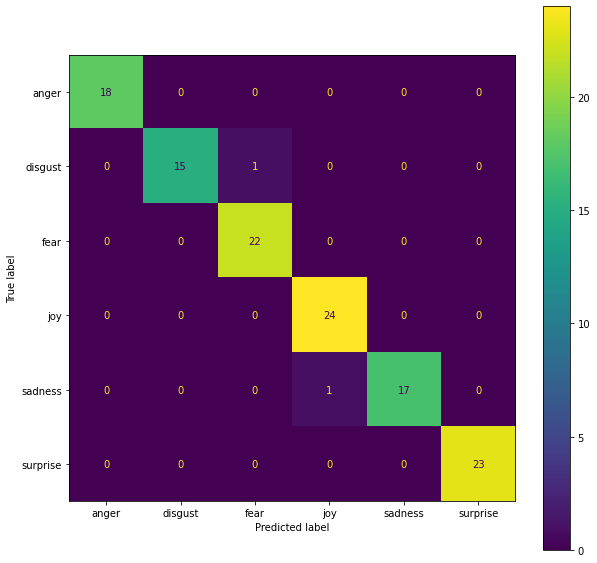

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
fig, ax = plt.subplots(figsize=(10, 10))

print(confusion_matrix(y_true=y_test, y_pred=y_predict))
plot_confusion_matrix(classifier_model, text_test, y_test, display_labels=labels, ax=ax, values_format='d')  
plt.show()

# Misclassification Result

In [ ]:
# inv_encoding = {v: k for k, v in encoding.items()}

df = pd.DataFrame(X_test, columns=['content'])
df['actual'] = [encoding[sentiment] for sentiment in y_test]
df['predict'] = [encoding[sentiment] for sentiment in y_predict]
df = df[df['actual'] != df['predict']]
print(df.count())
display(df)

content    37
actual     37
predict    37
dtype: int64


,content,actual,predict
6,งั้นวันอังคารถึงพุธขอrestดีกว่ากลัวช็อค+เสียใจ...,sadness,fear
22,มีใครรู้บ้างว่าถ้าไปโรงพยาบาลศิริราช รักษาโรคซ...,sadness,surprise
35,ขอบคุณมากมุง สัมภาษณ์1ชั่วโมง กุกลัวเดทแอร์มาก...,fear,joy
37,เอาจิงตอนดูทีมว้อนเต้นที่ต้องเต้นเลียนแบบอีกที...,anger,fear
55,จิงเรื่องน้องวินมันแบบดูยากมากทั้งๆที่น้องอยู่...,sadness,anger
60,,anger,surprise
86,วิวไหลไปเรื่อยๆแบบไม่ฟรีซอย่างน่าประหลาดใจ เป็...,surprise,fear
97,เอาจริงๆแอบเสียดายนิดๆตอนขายได้แต่ละชิ้นแต่รวม...,joy,fear
108,กูเกิดมาทำไมวะ นี่หาคำตอบให้ตัวเองมาจะ27ปีแล้ว...,fear,disgust
111,ฉันโดนกล่าวหาว่าฉันเป็นปอบจอบกินตับเด็กน้อยฉัน...,disgust,fear
